## IMPORT DATASET DARI GOOGLE DRIVE

In [ ]:
! gdown --id 1eotQxccW-IYv-7bWaVle0W6nsq5A-4eB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eotQxccW-IYv-7bWaVle0W6nsq5A-4eB
To: /content/Face Shape 2.zip
100% 256M/256M [00:04<00:00, 59.5MB/s]


In [ ]:
!unzip /content/'Face Shape 2.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Face Shape/Test/Oval/oval_aug12_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug13_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug13_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug14_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug14_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug15_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug15_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug16_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug16_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug17_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug17_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug18_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug18_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug1_image_1.jpg  
  inflating: Face Shape/Test/Oval/oval_aug1_image_2.jpg  
  inflating: Face Shape/Test/Oval/oval_aug20_image_1.jpg  
  infla

## IMPORT LIBRARY

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from sklearn.utils import shuffle
import tensorflow as tf

## IMAGE PREPROCESSING

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

class_names = ['Diamond', 'Heart', 'Oblong', 'Oval', 'Round', 'Square', 'Triangle']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (224, 224)

def load_data():
    datasets = ['/content/Face Shape/Train', '/content/Face Shape/Test']
    output = []

    for dataset in datasets:
        images = []
        labels = []

        print("Loading {}".format(dataset))

        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.resize(image, IMAGE_SIZE)

                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

In [ ]:
# Load data
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/Face Shape/Train


100%|██████████| 600/600 [00:03<00:00, 188.32it/s]


Loading /content/Face Shape/Test


100%|██████████| 200/200 [00:00<00:00, 315.28it/s]


In [ ]:
# Print the class labels assigned by Python
for class_name in class_names:
    label = class_names_label[class_name]
    print(f"Class: {class_name}, Label: {label}")

Class: Diamond, Label: 0
Class: Heart, Label: 1
Class: Oblong, Label: 2
Class: Oval, Label: 3
Class: Round, Label: 4
Class: Square, Label: 5
Class: Triangle, Label: 6


In [ ]:
#efficientnetb1
! gdown 14hsh0AzxrJHbXYNvt15scjvt9nMpPkmw

Downloading...
From: https://drive.google.com/uc?id=14hsh0AzxrJHbXYNvt15scjvt9nMpPkmw
To: /content/model_efficientb1_faceshape.h5
100% 81.6M/81.6M [00:00<00:00, 93.3MB/s]


In [ ]:
#efficientnetv2m
! gdown 1aGhQT4XJawDmK3ylf7t8zQozGMCJr98X

Downloading...
From: https://drive.google.com/uc?id=1aGhQT4XJawDmK3ylf7t8zQozGMCJr98X
To: /content/model_efficientv2m_faceshape.h5
100% 1.05G/1.05G [00:12<00:00, 87.0MB/s]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')


train_generator = train_datagen.flow(x=train_images,
                                     y=train_labels,
                                     shuffle=True,
                                     batch_size=32,
                                     )

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow(x=test_images,
                                               y=test_labels,
                                               shuffle=True,
                                               batch_size=32,
                                               )

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('model_efficientv2m_faceshape.h5')  # Replace 'your_model_path.h5' with the actual path to your saved model

# Assuming you have a test dataset (test_images, test_labels)
# If not, you need to load the test dataset similar to how you loaded the training dataset

# Normalize test images
test_images_normalized = test_images / 255.0

# Make predictions on the test set
predictions = loaded_model.predict(test_images_normalized)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(test_labels, predicted_labels, average=None)
recall = recall_score(test_labels, predicted_labels, average=None)
f1 = f1_score(test_labels, predicted_labels, average=None)

for i, class_name in enumerate(class_names):
    print(f"\nMetrics for class '{class_name}':")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1 Score: {f1[i]:.4f}")

44/44 [==============================] - 16s 220ms/step
Accuracy: 0.5357
Classification Report:
              precision    recall  f1-score   support

     Diamond       0.83      0.25      0.38       200
       Heart       0.52      0.87      0.65       200
      Oblong       0.89      0.25      0.39       200
        Oval       1.00      0.07      0.12       200
       Round       0.58      0.88      0.70       200
      Square       0.40      0.92      0.56       200
    Triangle       0.60      0.52      0.56       200

    accuracy                           0.54      1400
   macro avg       0.69      0.54      0.48      1400
weighted avg       0.69      0.54      0.48      1400


Metrics for class 'Diamond':
Precision: 0.8333
Recall: 0.2500
F1 Score: 0.3846

Metrics for class 'Heart':
Precision: 0.5194
Recall: 0.8700
F1 Score: 0.6505

Metrics for class 'Oblong':
Precision: 0.8929
Recall: 0.2500
F1 Score: 0.3906

Metrics for class 'Oval':
Precision: 1.0000
Recall: 0.0650
F1 Score: 

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l2

base_model = EfficientNetV2M(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False,
    )

inp = base_model.input
m = base_model.output
m = Flatten()(m)
m = Dense(200, activation='relu', name='fc1')(m)
m = BatchNormalization()(m)
m = Dropout(0.3)(m)
m = Dense(100, activation='relu', name='fc2')(m)
m = Dropout(0.3)(m)
m = Dense(50, activation='relu', name='fc3')(m)
predictions= Dense(7, activation='softmax', name='pred')(m)
#this is the model we will train
new_model = Model(inputs=base_model.input, outputs=predictions)

new_model.summary()

214201816/214201816 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 24)         648       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 24)         96        ['stem_conv[0][0]']           
 n)                        

In [ ]:
for layer in new_model.layers:
  if layer.name=='block7e_dwconv2':
    break
  layer_trainable=False
  print('Layer'+layer.name+'frozen')

new_model.summary()

Layerinput_1frozen
Layerrescalingfrozen
Layerstem_convfrozen
Layerstem_bnfrozen
Layerstem_activationfrozen
Layerblock1a_project_convfrozen
Layerblock1a_project_bnfrozen
Layerblock1a_project_activationfrozen
Layerblock1a_addfrozen
Layerblock1b_project_convfrozen
Layerblock1b_project_bnfrozen
Layerblock1b_project_activationfrozen
Layerblock1b_dropfrozen
Layerblock1b_addfrozen
Layerblock1c_project_convfrozen
Layerblock1c_project_bnfrozen
Layerblock1c_project_activationfrozen
Layerblock1c_dropfrozen
Layerblock1c_addfrozen
Layerblock2a_expand_convfrozen
Layerblock2a_expand_bnfrozen
Layerblock2a_expand_activationfrozen
Layerblock2a_project_convfrozen
Layerblock2a_project_bnfrozen
Layerblock2b_expand_convfrozen
Layerblock2b_expand_bnfrozen
Layerblock2b_expand_activationfrozen
Layerblock2b_project_convfrozen
Layerblock2b_project_bnfrozen
Layerblock2b_dropfrozen
Layerblock2b_addfrozen
Layerblock2c_expand_convfrozen
Layerblock2c_expand_bnfrozen
Layerblock2c_expand_activationfrozen
Layerblock2c_p

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/Model CNN Faceshape"

Mounted at /content/drive


In [ ]:
from tensorflow.keras.optimizers import Adam

opt= Adam(0.0003, beta_1=0.9, beta_2=0.999, amsgrad=True)
new_model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
h = new_model.fit(train_generator,
                  validation_data=validation_generator,
                  epochs=20,
                  batch_size=50,
                  verbose=1,
                  shuffle=1)

Epoch 1/20
132/132 [==============================] - 284s 1s/step - loss: 2.0768 - accuracy: 0.1862 - val_loss: 1.7310 - val_accuracy: 0.2921
Epoch 2/20
132/132 [==============================] - 127s 958ms/step - loss: 1.7874 - accuracy: 0.2988 - val_loss: 1.8770 - val_accuracy: 0.2293
Epoch 3/20
132/132 [==============================] - 127s 958ms/step - loss: 1.5527 - accuracy: 0.4190 - val_loss: 1.7621 - val_accuracy: 0.4050
Epoch 4/20
132/132 [==============================] - 126s 950ms/step - loss: 1.4046 - accuracy: 0.5048 - val_loss: 1.4988 - val_accuracy: 0.4321
Epoch 5/20
132/132 [==============================] - 125s 945ms/step - loss: 1.1457 - accuracy: 0.5881 - val_loss: 1.1419 - val_accuracy: 0.5750
Epoch 6/20
132/132 [==============================] - 126s 953ms/step - loss: 0.8475 - accuracy: 0.7121 - val_loss: 1.7332 - val_accuracy: 0.4400
Epoch 7/20
132/132 [==============================] - 126s 955ms/step - loss: 0.6331 - accuracy: 0.8019 - val_loss: 0.8805 - va

In [ ]:
new_model.save('model_efficientv2m_faceshape.h5')
!cp 'model_efficientv2m_faceshape.h5' /content/drive/MyDrive/"Model CNN Faceshape"

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp 'model_efficientv2m_faceshape.h5' /content/drive/MyDrive/"Model CNN Faceshape"

In [ ]:
#CONVERT KE JSON DAN BIN
from keras.models import load_model
import json
import numpy as np

# Load model from H5 file
model = load_model('model_efficientv2m_faceshape.h5')

# Convert model to JSON format
model_json = model.to_json()

# Save the JSON model architecture to a file
with open('model_efficientv2m_faceshape.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to a binary file
model.save_weights('model_efficientv2m_faceshape.bin')

# Optionally, you can load the model from JSON and set the weights
# json_file = open('model_cnn_faceshape.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights('model_cnn_faceshape_weights.bin')

# Now, 'model_cnn_faceshape.json' contains the model architecture,
# and 'model_cnn_faceshape_weights.bin' contains the model weights.

In [ ]:
!cp model_efficientv2m_faceshape.json /content/drive/MyDrive/"Model CNN Faceshape"

In [ ]:
!cp model_efficientv2m_faceshape.bin.data-00000-of-00001 /content/drive/MyDrive/"Model CNN Faceshape"

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Create and train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    verbose=2)

model.save('model_efficient_faceshape.h5')
!cp 'model_efficient_faceshape.h5' /content/drive/MyDrive/model

Epoch 1/20
132/132 - 129s - loss: 33.0465 - accuracy: 0.3150 - val_loss: 30.4290 - val_accuracy: 0.1421 - 129s/epoch - 975ms/step
Epoch 2/20
132/132 - 75s - loss: 26.2773 - accuracy: 0.5090 - val_loss: 24.8215 - val_accuracy: 0.1479 - 75s/epoch - 568ms/step
Epoch 3/20
132/132 - 76s - loss: 20.7440 - accuracy: 0.6650 - val_loss: 19.9805 - val_accuracy: 0.1400 - 76s/epoch - 574ms/step
Epoch 4/20
132/132 - 74s - loss: 16.2957 - accuracy: 0.7531 - val_loss: 16.3153 - val_accuracy: 0.1707 - 74s/epoch - 564ms/step
Epoch 5/20
132/132 - 77s - loss: 12.6479 - accuracy: 0.8164 - val_loss: 13.1024 - val_accuracy: 0.1557 - 77s/epoch - 586ms/step
Epoch 6/20
132/132 - 73s - loss: 9.7491 - accuracy: 0.8745 - val_loss: 9.8998 - val_accuracy: 0.4021 - 73s/epoch - 557ms/step
Epoch 7/20
132/132 - 73s - loss: 7.5118 - accuracy: 0.8962 - val_loss: 9.2550 - val_accuracy: 0.1736 - 73s/epoch - 555ms/step
Epoch 8/20


KeyboardInterrupt: ignored

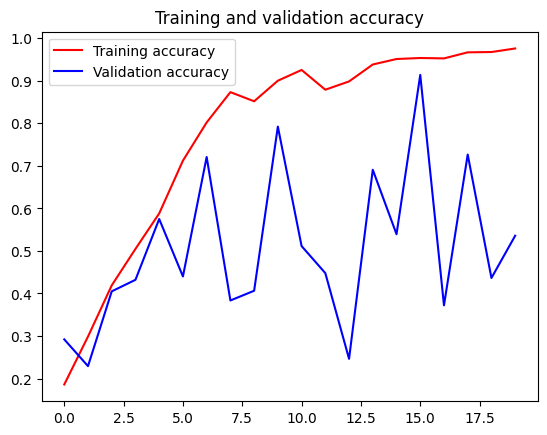

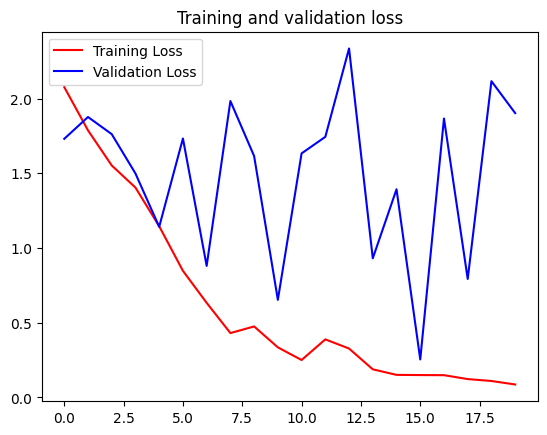

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()